In [44]:
import sys, os
sys.path.insert(0, os.path.abspath('../'))
from coreli import *
import itertools 
from functools import reduce
import matplotlib.pyplot as plt
import numpy as np

In [33]:
Z2 = Padic(2)
Z3 = Padic(3)
Z6 = Padic(6)

In [4]:
def metric(pv):
    # e.g. [1,0,0,0,1] -> 19/23
    cyclic_rational = ParityVector(pv).cyclic_rational()
    Z6 = Padic(6)
    # e.g. [1,0,0,0,1] -> 19/23 -> (41013220304)* 5
    five_adic_expansion = Z6.from_rational(cyclic_rational).rational_periodic_representation()

    # |period| + |preperiod|
    expansion_len = len(five_adic_expansion)-4

    # all the 1s of the pv correspond to 4 possible tile north-west angle and the 0s to 2 possible horizontal 0/1
    max_len = reduce(lambda x, y: x * y, [4 if i == 1 else 2 for i in pv])

    return expansion_len/max_len
    


In [7]:
metrics = []
for pv in itertools.product([0,1],repeat=10):
    metrics.append(metric(pv))

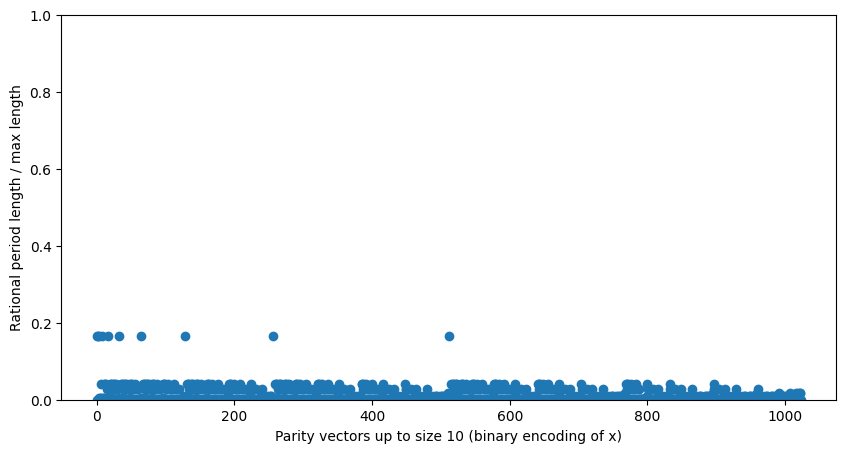

In [20]:
plt.figure(figsize=(10,5))
plt.ylim(0,1)
plt.plot(metrics, 'o')
plt.ylabel("Rational period length / max length")
plt.xlabel("Parity vectors up to size 10 (binary encoding of x)")
plt.show()

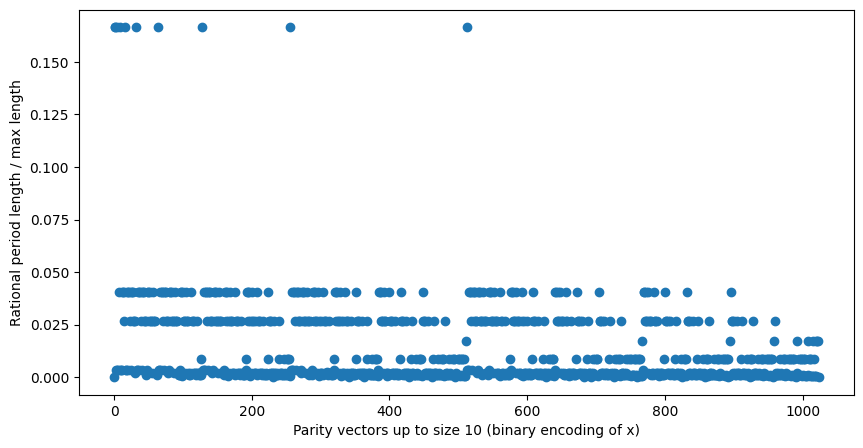

In [25]:
plt.figure(figsize=(10,5))
plt.plot(metrics, 'o')
plt.ylabel("Rational period length / max length")
plt.xlabel("Parity vectors up to size 10 (binary encoding of x)")
plt.show()

In [46]:
np.mean(metrics)

np.float64(0.013734228909015656)

## Len 15

In [21]:
metrics_15 = []
for pv in itertools.product([0,1],repeat=15):
    metrics_15.append(metric(pv))

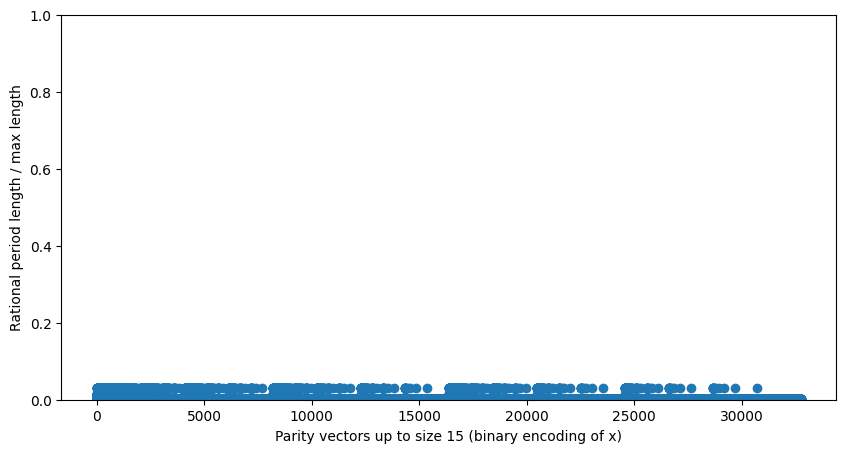

In [22]:
plt.figure(figsize=(10,5))
plt.ylim(0,1)
plt.plot(metrics_15, 'o')
plt.ylabel("Rational period length / max length")
plt.xlabel("Parity vectors up to size 15 (binary encoding of x)")
plt.show()

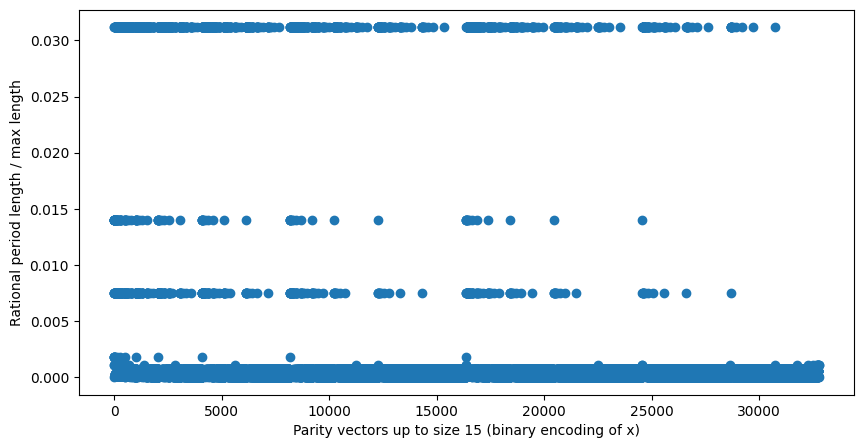

In [24]:
plt.figure(figsize=(10,5))
plt.plot(metrics_15, 'o')
plt.ylabel("Rational period length / max length")
plt.xlabel("Parity vectors up to size 15 (binary encoding of x)")
plt.show()

In [45]:
np.mean(metrics_15)

np.float64(0.001690322834519975)

## Finding the argmax of metrics_10

In [26]:
metrics_10_with_arg = []
for pv in itertools.product([0,1],repeat=10):
    metrics_10_with_arg.append((metric(pv),pv))

In [27]:
for m, pv in metrics_10_with_arg:
    if m == max(metrics):
        print(m, pv)

0.16650390625 (0, 0, 0, 0, 0, 0, 0, 0, 0, 1)
0.16650390625 (0, 0, 0, 0, 0, 0, 0, 0, 1, 0)
0.16650390625 (0, 0, 0, 0, 0, 0, 0, 1, 0, 0)
0.16650390625 (0, 0, 0, 0, 0, 0, 1, 0, 0, 0)
0.16650390625 (0, 0, 0, 0, 0, 1, 0, 0, 0, 0)
0.16650390625 (0, 0, 0, 0, 1, 0, 0, 0, 0, 0)
0.16650390625 (0, 0, 0, 1, 0, 0, 0, 0, 0, 0)
0.16650390625 (0, 0, 1, 0, 0, 0, 0, 0, 0, 0)
0.16650390625 (0, 1, 0, 0, 0, 0, 0, 0, 0, 0)
0.16650390625 (1, 0, 0, 0, 0, 0, 0, 0, 0, 0)


In [29]:
cyclic_rational = ParityVector((0, 0, 0, 0, 0, 0, 0, 0, 0, 1)).cyclic_rational()
cyclic_rational

512/1021

In [31]:
Z6.from_rational(cyclic_rational).rational_periodic_representation()

'(1255403242212452003215050401550255521052442534401043414120354055544214532551320213123224115215553243350554304043025045223443555053114155301213005413445133155415023235500243001523133431035523405051540053000345031130211545121414352015000113410230042353424323314403400023122050012515125305103321120005024414002543425501421104224001405323200553)* 2'

In [34]:
Z3.from_rational(cyclic_rational).rational_periodic_representation()

'(1111110102120201211111121201020210)* 2'

In [35]:
Z2.from_rational(cyclic_rational).rational_periodic_representation()

'(0111111111011111111001111110110111110010011101011101100001100010010010011011011101001001011101110001100101010010111111100011111010101111000000110100001001110001110101010110000000001000000001100000010010000011011000101000100111100111011011011001001000101101101000100011100110101011010000000111000001010100001111110010111101100011100010101010)* 1000000000'

## Finding the argmax of metrics_15

In [37]:
def int_to_binary_list(i, k):
    """
    Convert an integer to its binary expansion as a list of k bits (least significant bit last).

    Args:
        i (int): The integer to convert.
        k (int): The number of bits in the binary expansion.

    Returns:
        list[int]: A list of k bits representing the binary expansion of i.
    """
    return [int(bit) for bit in f"{i:0{k}b}"]

In [41]:
for i,m in enumerate(metrics_15):
    if m == max(metrics_15):
        print(m, int_to_binary_list(i,15))

0.031175613403320312 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
0.031175613403320312 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1]
0.031175613403320312 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1]
0.031175613403320312 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1]
0.031175613403320312 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1]
0.031175613403320312 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1]
0.031175613403320312 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1]
0.031175613403320312 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1]
0.031175613403320312 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1]
0.031175613403320312 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
0.031175613403320312 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1]
0.031175613403320312 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
0.031175613403320312 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
0.031175613403320312 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
0.031175613403320312 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1

In [42]:
cyclic_rational = ParityVector([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]).cyclic_rational()
cyclic_rational

133120/32687

In [43]:
Z6.from_rational(cyclic_rational).rational_periodic_representation()

'(03532154151023400132341331234322521550342044251523430325130040342155145102003325343250122344223254111013444434122324553004132351144401312033120400251415441532245413511554510254504204220123535004401050242404050250545022411511301123343534052132204255024514521250050352025033555400344314520555212222351255254450210121013501200031010441521200100054254444533530145312304324235550531442410013315542445041514542152531154440225334541531140442130224504122410402325342013531520034402404242553444405034512025230302300130541521323315141113334104203234411240053244044422051254440352554024350030012403314003054135410423232222420343111413543551104515015421320243140334141432023455540202050534514410352512215024420350020155240324451524121203255314120500055240201232441302314125041031401123511153134551053425302004020221415400122524204245211351532134520333421510041254424031045342501112545054404105521235001034211333534035410300013140001453541140454452133150011323430034251511104420444151425131440152110152442440333